In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

Load data that has only Intensities and it has been normalised without any NAN values

In [3]:
df = pd.read_excel("WF305900_normalized_Intensities.xlsx")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.068622,0.083932,0.131006,0.110712,0.091700,0.242029,0.086491,0.120168,0.087758,0.090859,...,0.127396,0.071876,0.196801,0.145509,0.170728,0.065765,0.053665,0.078728,0.066666,0.142620
1,0.056056,0.044472,0.071253,0.038244,0.072514,0.062007,0.086187,0.037235,0.237438,0.056541,...,0.089301,0.144980,0.051161,0.115317,0.081901,0.062326,0.025021,0.158073,0.066427,0.032316
2,0.077852,0.068586,0.097842,0.047826,0.063317,0.055662,0.101452,0.066193,0.145681,0.000000,...,0.000448,0.068762,0.092149,0.076206,0.083214,0.053237,0.019427,0.162944,0.077739,0.052962
3,0.036581,0.079750,0.102480,0.023690,0.124432,0.124074,0.174516,0.118123,0.155561,0.085115,...,0.144612,0.201845,0.058929,0.204697,0.102756,0.074187,0.045000,0.141348,0.066891,0.026245
4,0.025598,0.111947,0.133619,0.036449,0.068158,0.209541,0.083468,0.257534,0.014220,0.046970,...,0.292240,0.069515,0.086225,0.216104,0.137389,0.088567,0.043240,0.028853,0.040062,0.042705


In [4]:
import umap
reducer = umap.UMAP()

In [5]:
my_data = df.values

In [6]:
scaled_my_data = StandardScaler().fit_transform(my_data)

Typically the matrix is 12655*64 dimensions which is now reduced to 12655*2??My understanding is that clusters should be formed based on their Intensities range because every peptide is unique and we get a straight line when we did a scatter plot of peptide to protein!So clusters of 10 colors should be formed based on Intensities or it would be 12655 colors which does not solve our purpose.

In [7]:
embedding = reducer.fit_transform(scaled_my_data)
embedding.shape

(12655, 2)

Now Intensities column and other two column such as RT_time and pg_score come to picture??

Text(0.5, 1.0, 'UMAP projection of the Intensities dataset')

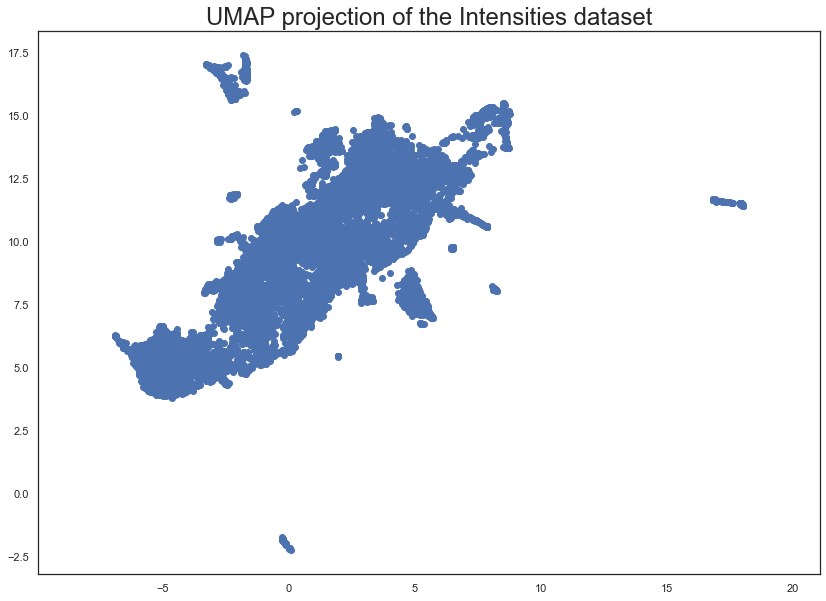

In [8]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    )
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Intensities dataset', fontsize=24)

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in scaled_my_data.map({"Inetnsity1":0, "Intensity2":1, "Intensity3":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Intensities dataset', fontsize=24)